In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c digit-recognizer

digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("digit-recognizer.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd

data= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")


In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data.drop("label", axis=1)
y = data["label"]


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Set random seed

import tensorflow as tf
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model = tf.keras.Sequential([
  tf.keras.layers.Dense(784,activation= "relu"),
  tf.keras.layers.Dense(392, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(196,activation= "relu"),
  tf.keras.layers.Dense(98,activation= "relu"),
  tf.keras.layers.Dense(10,activation ="softmax") 
])

model.compile(
      optimizer=tf.keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy'])

model.fit(
    X_train, 
    y_train, 
    validation_data = (X_test, y_test),
    epochs = 20)


Epoch 1/20
1050/1050 [==============================] - 11s 9ms/step - loss: 1.0953 - accuracy: 0.8900 - val_loss: 0.2239 - val_accuracy: 0.9400
Epoch 2/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1910 - accuracy: 0.9463 - val_loss: 0.2212 - val_accuracy: 0.9443
Epoch 3/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1609 - accuracy: 0.9545 - val_loss: 0.2115 - val_accuracy: 0.9427
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1434 - accuracy: 0.9596 - val_loss: 0.1985 - val_accuracy: 0.9498
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1346 - accuracy: 0.9631 - val_loss: 0.2348 - val_accuracy: 0.9438
Epoch 6/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1084 - accuracy: 0.9699 - val_loss: 0.1554 - val_accuracy: 0.9626
Epoch 7/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1022 - accuracy: 0.9725 - val_loss: 0.1610 - val_accuracy

In [ ]:
pred = model.predict(test)

In [ ]:
import numpy as np
pred = np.argmax(pred,axis = 1)

pred = pd.Series(pred,name="Label")
    

In [ ]:
pred

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [ ]:
submission1 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)

submission1.to_csv("submission.csv",index=False)

In [ ]:
submission1

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
!kaggle competitions submit -c digit-recognizer -f submission1.csv -m "try 1 without cnn"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/kaggle/cli.py", line 67, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 562, in competition_submit_cli
    competition, quiet)
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 513, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/usr/lib/python3.7/genericpath.py", line 50, in getsize
    return os.stat(filename).st_size
FileNotFoundError: [Errno 2] No such file or directory: 'submission1.csv'


In [ ]:
import tensorflow as tf

train_y = data['label'].astype('float32')
train_x = data.drop(['label'],axis = 1).astype('int32')
test_x = test.astype('float32')
train_x = train_x.values.reshape(-1,28,28,1)
train_x = train_x / 255.0
test_x = test_x.values.reshape(-1,28,28,1)
test_x = test_x / 255.0
train_x.shape, test_x.shape
train_y = tf.keras.utils.to_categorical(train_y,10)
train_y.shape

(42000, 10)

In [ ]:
# Try a simplified model (removed two layers)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_10 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  Conv2D(64, 3, activation='relu'),

  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])




In [ ]:
model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                  

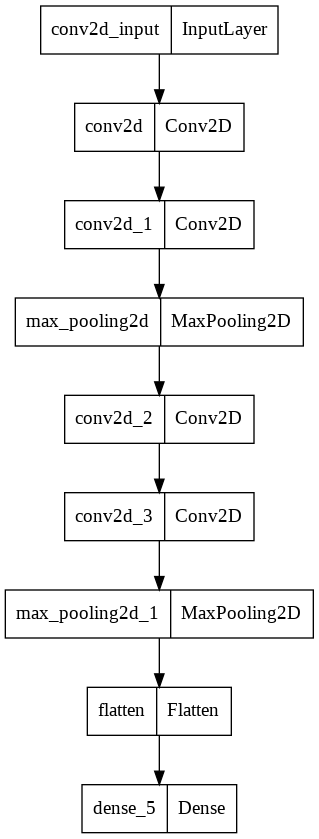

In [ ]:
tf.keras.utils.plot_model(model_10)


In [ ]:
model_10.fit(train_x,
                          train_y,
                          epochs=10)

Epoch 1/10
1313/1313 [==============================] - 14s 10ms/step - loss: 0.1517 - accuracy: 0.9544
Epoch 2/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0466 - accuracy: 0.9856
Epoch 3/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0346 - accuracy: 0.9892
Epoch 4/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0255 - accuracy: 0.9920
Epoch 5/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0212 - accuracy: 0.9931
Epoch 6/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0175 - accuracy: 0.9945
Epoch 7/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0126 - accuracy: 0.9958
Epoch 8/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 9/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0098 - accuracy: 0.9968
Epoch 10/10
1313/1313 [==============================] - 12s 9ms/step - 

In [ ]:
model_10.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                  

In [ ]:
import numpy as np
pred = model_10.predict(test_x)
pred = np.argmax(pred,axis = 1)

pred = pd.Series(pred,name="Label")
pred

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)

submission.to_csv("submission.csv",index=False)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "With cnn and without transfer Learning"

100% 208k/208k [00:00<00:00, 242kB/s]
Successfully submitted to Digit Recognizer